<a href="https://colab.research.google.com/github/RacheleRice/h5n1_pandy_probability/blob/main/12_20_24_h5n1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

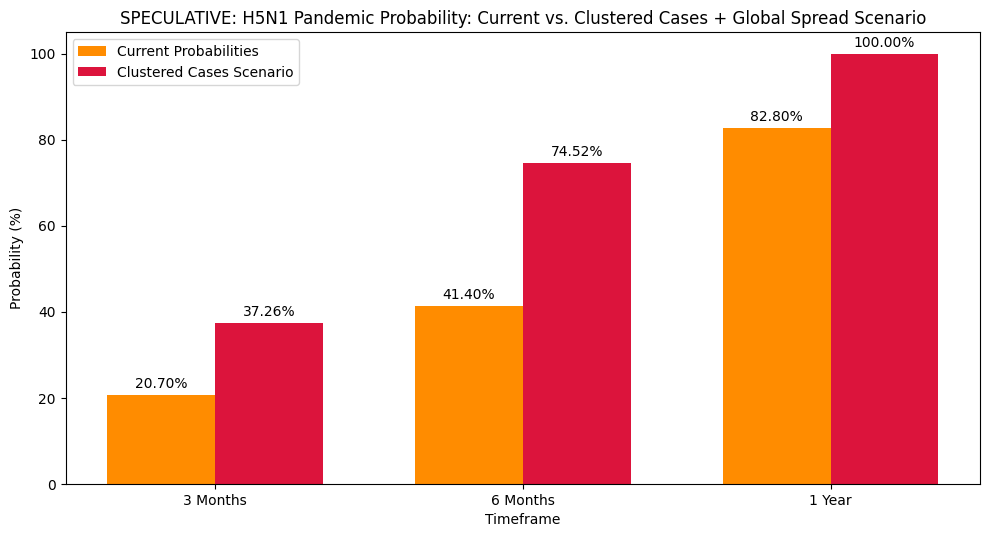

{'Current Probabilities (%)': [20.7, 41.4, 82.8],
 'Clustered Scenario Probabilities (%)': [37.26, 74.52, 100.0]}

In [8]:
# Revised probabilities  ***RESULTS SPECULATIVE***
prior_pandemic = 0.08  # Adjusted prior due to unchecked spread in dairy herds and human cases
likelihood_spread = 0.75  # Higher risk of sustained H2H transmission via workers and asymptomatic shedding
new_evidence_factor = 0.95  # Strong evidence from human cases, milk testing, and biosecurity failures
global_spread_factor = 0.15  # Additive increase reflecting global spread potential

# Current probabilities using Bayesian adjustment
prob_3_months = (prior_pandemic * likelihood_spread * new_evidence_factor) + global_spread_factor
prob_6_months = prob_3_months * 2.0  # Risk compounds further over time
prob_1_year = prob_3_months * 4.0  # Risk significantly higher over a year

# Ensure probabilities do not exceed 100%
prob_3_months = min(prob_3_months, 1.0)
prob_6_months = min(prob_6_months, 1.0)
prob_1_year = min(prob_1_year, 1.0)

# Clustered cases scenario
cluster_multiplier = 1.8  # Increased likelihood due to observed clusters
prob_3_months_cluster = (prob_3_months * cluster_multiplier)
prob_6_months_cluster = (prob_6_months * cluster_multiplier)
prob_1_year_cluster = (prob_1_year * cluster_multiplier)

# Ensure cluster probabilities do not exceed 100%
prob_3_months_cluster = min(prob_3_months_cluster, 1.0)
prob_6_months_cluster = min(prob_6_months_cluster, 1.0)
prob_1_year_cluster = min(prob_1_year_cluster, 1.0)

# Convert probabilities to percentages
current_probabilities = [prob_3_months * 100, prob_6_months * 100, prob_1_year * 100]
cluster_probabilities = [
    prob_3_months_cluster * 100,
    prob_6_months_cluster * 100,
    prob_1_year_cluster * 100,
]
timeframes = ['3 Months', '6 Months', '1 Year']

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(timeframes))
bar_width = 0.35

# Bar chart for current probabilities
bars1 = plt.bar(index, current_probabilities, bar_width, label='Current Probabilities', color='darkorange')

# Bar chart for clustered scenario
bars2 = plt.bar(index + bar_width, cluster_probabilities, bar_width, label='Clustered Cases Scenario', color='crimson')

# Chart details
plt.title('SPECULATIVE: H5N1 Pandemic Probability: Current vs. Clustered Cases + Global Spread Scenario')
plt.ylabel('Probability (%)')
plt.xlabel('Timeframe')
plt.xticks(index + bar_width / 2, timeframes)
plt.ylim(0, 105)
plt.legend()

# Add value labels
for bars, values in zip([bars1, bars2], [current_probabilities, cluster_probabilities]):
    for bar, value in zip(bars, values):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
fig.subplots_adjust(top=0.85)  # Adjust the top margin for the title
plt.show()

# Output probabilities for record
{
    "Current Probabilities (%)": current_probabilities,
    "Clustered Scenario Probabilities (%)": cluster_probabilities
}
